<a href="https://colab.research.google.com/github/WillianCella/ModelosDeAprendizadoSupervisionado2/blob/main/Trabalho_2_%E2%80%93_Modelos_de_Aprendizado_Supervisionado_RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [24]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [25]:
path = "/content/drive/MyDrive/Shared/auto-mpg2.csv"
#base = pd.read_csv("/content/drive/MyDrive/Shared/Concrete.csv")
base = pd.read_csv(path, sep = ';')
print(base)
print(base.describe())

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0         130    3504          12.0   
1    15.0          8         350.0         165    3693          11.5   
2    18.0          8         318.0         150    3436          11.0   
3    16.0          8         304.0         150    3433          12.0   
4    17.0          8         302.0         140    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
401  27.0          4         140.0          86    2790          15.6   
402  44.0          4          97.0          52    2130          24.6   
403  32.0          4         135.0          84    2295          11.6   
404  28.0          4         120.0          79    2625          18.6   
405  31.0          4         119.0          82    2720          19.4   

     model_year  origin  car_brand            model  
0            70       1  chevrolet  chevelle malibu  
1            70       1    

In [26]:
#separando os atributos
mpg = base.iloc[:,0].values # Milhas por galão
cilindros = base.iloc[:,1].values
deslocamento = base.iloc[:,2].values
hp = base.iloc[:,3].values
peso = base.iloc[:,4].values
aceleracao = base.iloc[:,5].values
anoModelo = base.iloc[:,6].values
origem = base.iloc[:,7].values
marca = base.iloc[:,8].values
modelo = base.iloc[:,9].values

print("HP: ", hp)

HP:  [130 165 150 150 140 198 220 215 225 190 115 165 153 175 175 170 160 140
 150 225  95  95  97  85  88  46  87  90  95 113  90 215 200 210 193  88
  90  95   0  48 100 105 100  88 100 165 175 153 150 180 170 175 110  72
 100  88  86  90  70  76  65  69  60  70  95  80  54  90  86 165 175 150
 153 150 208 155 160 190  97 150 130 140 150 112  76  87  69  86  92  97
  80  88 175 150 145 137 150 198 150 158 150 215 225 175 105 100 100  88
  95  46 150 167 170 180 100  88  72  94  90  85 107  90 145 230  49  75
  91 112 150 110 122 180  95   0 100 100  67  80  65  75 100 110 105 140
 150 150 140 150  83  67  78  52  61  75  75  75  97  93  67  95 105  72
  72 170 145 150 148 110 105 110  95 110 110 129  75  83 100  78  96  71
  97  97  70  90  95  88  98 115  53  86  81  92  79  83 140 150 120 152
 100 105  81  90  52  60  70  53 100  78 110  95  71  70  75  72 102 150
  88 108 120 180 145 130 150  68  80  58  96  70 145 110 145 130 110 105
 100  98 180 170 190 149  78  88  75  89  63  

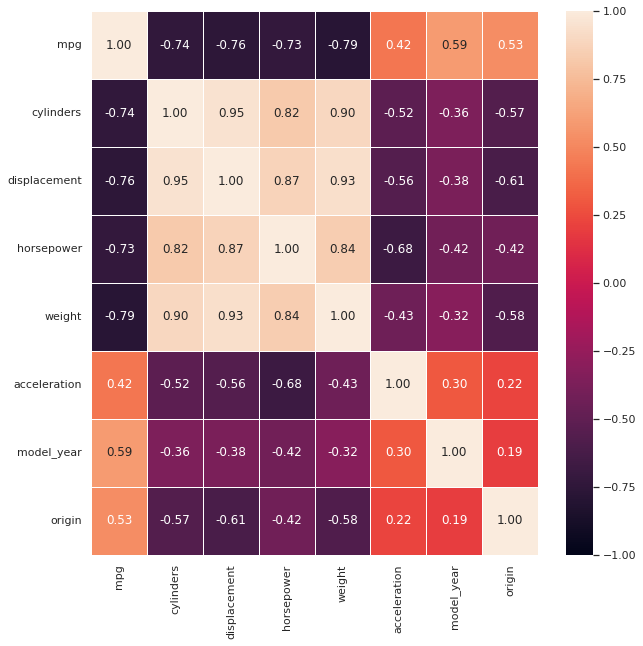

In [27]:
#analisando o relacionamento entre as variáveis
plt.figure(figsize=(10, 10))
sn.set(font_scale=1)
sn.heatmap(base.corr(),annot=True,vmin=-1, vmax=1,linewidth=.5,fmt=".2f");
plt.show()

HP
b em X:  38.65021773618865
a em X:  [-0.15067182]
Coef.Det.:  0.5280495842036812


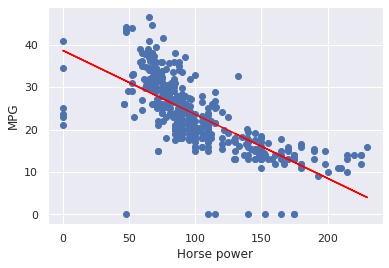

Cilindros
b em X:  42.8145567138634
a em X:  [-3.60949619]
Coef. Det.:  0.5410524207076919


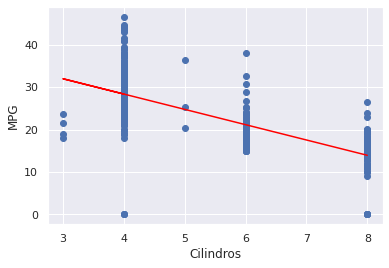

In [28]:
#instanciando e treinando os modelos lineares
hp = hp.reshape(-1,1)
modelo1 = LinearRegression()
modelo1.fit(hp,mpg)

print ("HP")
print ("b em X: ", modelo1.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", modelo1.coef_) #obtendo a inclinação do modelo
print ("Coef.Det.: ",modelo1.score(hp,mpg)) #obtendo o coeficiente de determinação do modelo

plt.scatter(hp,mpg)
plt.xlabel("Horse power") #variável explicativa
plt.ylabel("MPG") #variável dependente
plt.plot(hp, modelo1.predict(hp),color='red') #plotando a reta do modelo
plt.show()


cilindros = cilindros.reshape(-1,1)
modelo2 = LinearRegression()
modelo2.fit(cilindros,mpg)

print ("Cilindros")
print ("b em X: ", modelo2.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", modelo2.coef_) #obtendo a inclinação do modelo
print ("Coef. Det.: ",modelo2.score(cilindros,mpg)) #obtendo o coeficiente de determinação do modelo

plt.scatter(cilindros,mpg)
plt.xlabel("Cilindros") #variável explicativa
plt.ylabel("MPG") #variável dependente
plt.plot(cilindros, modelo2.predict(cilindros),color='red') #plotando a reta do modelo
plt.show()

In [36]:
#realizando predições com base em variáveis individuais

#horse power
#qual a média (mpg) do veículo com 175 hp
print("HP: ",modelo1.intercept_ + modelo1.coef_ * 175.0, "MPG - miles per gallon")

#horse power
#qual a média (mpg) do veículo com 150 hp
print("HP: ",modelo1.intercept_ + modelo1.coef_ * 150.0, "MPG - miles per gallon")

HP:  [12.28265011] MPG - miles per gallon
HP:  [16.04944548] MPG - miles per gallon


In [37]:
#avaliando os resíduos dos modelos contruídos
#modelo1 --> horse power
#modelo2 --> cilindros

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("HP")
predict = modelo1.predict(hp)
print("Erro médio quadrático (MSE): ", mean_squared_error(mpg,predict,squared=True))
print("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(mpg,predict,squared=False))
print("Erro médio absoluto (MAE): ", mean_absolute_error(mpg,predict))

print()
print("Cilindros")
predict = modelo2.predict(cilindros)
print("Erro médio quadrático (MSE): ", mean_squared_error(mpg,predict,squared=True))
print("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(mpg,predict,squared=False))
print("Erro médio absoluto (MAE): ", mean_absolute_error(mpg,predict))


HP
Erro médio quadrático (MSE):  33.2328586004863
Raiz quadrada do Erro médio quadrático (RMSE):  5.764794757880484
Erro médio absoluto (MAE):  4.226779067177409

Cilindros
Erro médio quadrático (MSE):  32.317250916967446
Raiz quadrada do Erro médio quadrático (RMSE):  5.684826375270176
Erro médio absoluto (MAE):  4.000790105780647


In [39]:
#construindo um modelo baseado em múltiplas variáveis explicativas

NovaBase = pd.DataFrame(base,columns=base.columns[1:-2])
RegMultipla = LinearRegression().fit(NovaBase, mpg)

print ("Todas as variáveis")
print ("b em X: ", RegMultipla.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", RegMultipla.coef_) #obtendo a inclinação do modelo
print ("Coef. Det.: ",RegMultipla.score(NovaBase,mpg)) #obtendo o coeficiente de determinação do modelo

predict = RegMultipla.predict(NovaBase)
print("\nAnálise de Resíduos")
print("Erro médio quadrático (MSE): ", mean_squared_error(mpg,predict,squared=True))
print("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(mpg,predict,squared=False))
print("Erro médio absoluto (MAE): ", mean_absolute_error(mpg,predict))

Todas as variáveis
b em X:  -25.18390124458053
a em X:  [-0.35727094  0.02064036 -0.01334145 -0.00686144  0.13909176  0.83771619
  1.42528934]
Coef. Det.:  0.7585958235767666

Análise de Resíduos
Erro médio quadrático (MSE):  16.998715526299023
Raiz quadrada do Erro médio quadrático (RMSE):  4.122949857359294
Erro médio absoluto (MAE):  2.836985847931581


In [40]:
#construindo um modelo de regressão com hold-out
#neste caso será usado 50% para treino e 50% para teste
from sklearn.model_selection import train_test_split 

NovaBase = pd.DataFrame(base,columns=base.columns[1:-2])

x_treino, x_teste, y_treino, y_teste = train_test_split(NovaBase, mpg, test_size=0.5, random_state=10,shuffle=True)
Modelo = LinearRegression().fit(x_treino, y_treino)

print("Modelo construído")
print ("b em X: ", Modelo.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", Modelo.coef_) #obtendo a inclinação do modelo

print ("\n\nTodas as variáveis sobre o conjunto de treino")
print ("Coef. Det. sobre o treino: ",Modelo.score(x_treino,y_treino)) #obtendo o coeficiente de determinação do modelo
predict = Modelo.predict(x_treino)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_treino,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_treino,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_treino,predict))


print ("\n\nTodas as variáveis sobre o conjunto de teste")
print ("Coef. Det. sobre o teste: ",Modelo.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
predict = Modelo.predict(x_teste)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_teste,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_teste,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_teste,predict))

Modelo construído
b em X:  -30.642718202661836
a em X:  [-0.19440696  0.0186774   0.00604444 -0.00784132  0.15012639  0.92400689
  0.67077302]


Todas as variáveis sobre o conjunto de treino
Coef. Det. sobre o treino:  0.7249154372254017
Análise de Resíduos
Erro médio quadrático (MSE):  19.30830074447064
Raiz quadrada do Erro médio quadrático (RMSE):  4.394121157236182
Erro médio absoluto (MAE):  2.9026972165374967


Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.7770568109916992
Análise de Resíduos
Erro médio quadrático (MSE):  15.656277608490962
Raiz quadrada do Erro médio quadrático (RMSE):  3.9568014365761344
Erro médio absoluto (MAE):  2.9869799843420783


                      SVR
Coef. Det. sobre o treino:  0.5103040383794728

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.5106854768134894
Análise de Resíduos
Erro médio quadrático (MSE):  34.36231466389029
Raiz quadrada do Erro médio quadrático (RMSE):  5.861937790858096
Erro médio absoluto (MAE):  4.347265213594521






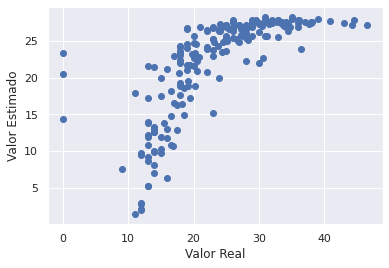

                      KNN
Coef. Det. sobre o treino:  1.0

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.6664331899500909
Análise de Resíduos
Erro médio quadrático (MSE):  23.424867125793668
Raiz quadrada do Erro médio quadrático (RMSE):  4.839924289262557
Erro médio absoluto (MAE):  3.4719471864968607




                 RANDOM FOREST
Coef. Det. sobre o treino:  0.9296646942595803

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  0.6295022846263487
Análise de Resíduos
Erro médio quadrático (MSE):  26.018355218672237
Raiz quadrada do Erro médio quadrático (RMSE):  5.1008190733128576
Erro médio absoluto (MAE):  3.074257130686003




                      MLP
Coef. Det. sobre o treino:  -4.920161858178199

Todas as variáveis sobre o conjunto de teste
Coef. Det. sobre o teste:  -5.0234912522469
Análise de Resíduos
Erro médio quadrático (MSE):  423.00216318329905
Raiz quadrada do Erro médio quadrático (RMSE):  20.567016389921488
Erro médi

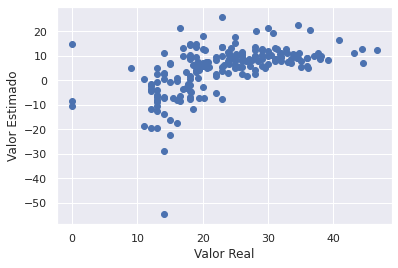

In [41]:
#aplicando modelos de Machine Learning para realizar a estimação

#1º passo, separando treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(NovaBase, mpg, test_size=0.5, random_state=10,shuffle=True)

# SVM
from sklearn.svm import SVR
svr = SVR(kernel='poly', C=100)
svr.fit(x_treino,y_treino)
print ("                      SVR")
print ("Coef. Det. sobre o treino: ",svr.score(x_treino,y_treino)) #obtendo o coeficiente de determinação do modelo

print ("\nTodas as variáveis sobre o conjunto de teste")
print ("Coef. Det. sobre o teste: ",svr.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
predict = svr.predict(x_teste)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_teste,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_teste,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_teste,predict))
print ("\n\n\n")

plt.scatter(y_teste,predict)
plt.xlabel("Valor Real") #variável explicativa
plt.ylabel("Valor Estimado") #variável dependente
plt.show()


# KNN
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=50,weights='distance')
KNN.fit(x_treino,y_treino)
print ("                      KNN")
print ("Coef. Det. sobre o treino: ",KNN.score(x_treino,y_treino)) #obtendo o coeficiente de determinação do modelo

print ("\nTodas as variáveis sobre o conjunto de teste")
print ("Coef. Det. sobre o teste: ",KNN.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
predict = KNN.predict(x_teste)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_teste,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_teste,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_teste,predict))
print ("\n\n\n")

#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(max_depth=5,n_estimators=100)
RFR.fit(x_treino,y_treino)
print ("                 RANDOM FOREST")
print ("Coef. Det. sobre o treino: ",RFR.score(x_treino,y_treino)) #obtendo o coeficiente de determinação do modelo

print ("\nTodas as variáveis sobre o conjunto de teste")
print ("Coef. Det. sobre o teste: ",RFR.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
predict = RFR.predict(x_teste)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_teste,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_teste,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_teste,predict))
print ("\n\n\n")


#Multilayer Perceptron
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', alpha=0.0001, max_iter=200)
MLP.fit(x_treino,y_treino)
print ("                      MLP")
print ("Coef. Det. sobre o treino: ",MLP.score(x_treino,y_treino)) #obtendo o coeficiente de determinação do modelo

print ("\nTodas as variáveis sobre o conjunto de teste")
print ("Coef. Det. sobre o teste: ",MLP.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
predict = MLP.predict(x_teste)
print ("Análise de Resíduos")
print ("Erro médio quadrático (MSE): ", mean_squared_error(y_teste,predict,squared=True))
print ("Raiz quadrada do Erro médio quadrático (RMSE): ", mean_squared_error(y_teste,predict,squared=False))
print ("Erro médio absoluto (MAE): ", mean_absolute_error(y_teste,predict))
print ("\n\n\n")

plt.scatter(y_teste,predict)
plt.xlabel("Valor Real") #variável explicativa
plt.ylabel("Valor Estimado") #variável dependente
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


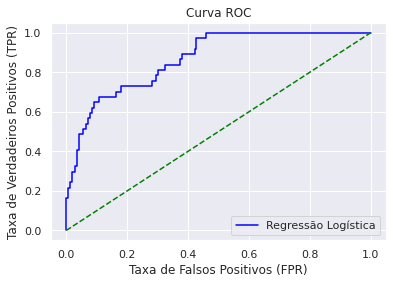

AUC:  0.8671442526864214
              precision    recall  f1-score   support

           1       0.91      0.89      0.90       127
           2       0.59      0.62      0.61        37
           3       0.60      0.62      0.61        39

    accuracy                           0.79       203
   macro avg       0.70      0.71      0.70       203
weighted avg       0.79      0.79      0.79       203

Classe Predita    1   2   3
Classe Real                
1               113   9   5
2                 3  23  11
3                 8   7  24


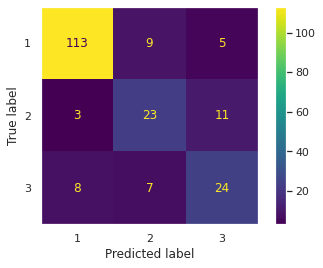

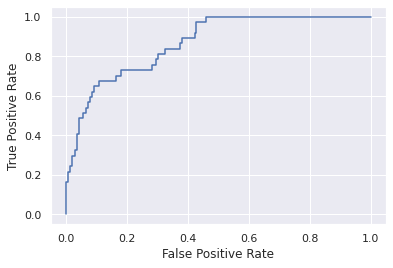

In [49]:
#aplicando a regressão logística para estimação

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

#função para plotar o gráfico da curva ROC
def plot_roc_curve(fper, tper,cor,classsificador):
    plt.plot(fper, tper, color=cor, label=classsificador)
    plt.plot([0, 1], [0, 1], color="green", linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()


dados = pd.read_csv(path, sep=';')
df_temp = pd.DataFrame(dados,columns=dados.columns[1:-2])

x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['origin'],test_size=0.5,stratify=dados['origin'])

RL = LogisticRegression()
RL.fit(x_treino,y_treino)
predict = RL.predict(x_teste)

predict_prob = RL.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = roc_curve(y_teste, predict_prob,pos_label=2)
plot_roc_curve(fpr,tpr,'blue',"Regressão Logística")
print("AUC: ",metrics.auc(fpr,tpr))


print(classification_report(y_teste, predict))

confusion_matrix = pd.crosstab(y_teste, predict, rownames=['Classe Real'], colnames=['Classe Predita'])
print(confusion_matrix)
#sn.heatmap(confusion_matrix, annot=True, cbar=False)

ConfusionMatrixDisplay.from_estimator(RL,x_teste,y_teste)
plt.grid(False)
plt.show()

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
